Code to try out simple Q learning with a multi-armed bandit setup. The twist is that if the same bandit is "pulled" twice in a row, then there is no reward for the second pull.

Docs for gym: https://gym.openai.com/docs/

In [5]:
import numpy as np
from gym import Env
from gym.spaces import Discrete
from matplotlib import pyplot as plt

In [86]:
class RudeBandits(Env):
    # A multi-armed bandit environment with 3 bandits. But if a bandit is pulled twice 
    # in a row, the payout is guaranteed to be 0.
    
    def __init__(self, pulls=10):
        
        self.action_space = Discrete(3)
        self.observation_space = Discrete(3)
        self.state = 0  # Always start assuming bandit 0 was pulled
        self.pulls = pulls
        self.pulls_remaining = pulls
        
        # Define the payouts and probability of payout
        self.probs = (0.8, 0.4, 0.1)
        #self.probs = (1.0, 1.0, 1.0)  # Always win
        self.rewards = (20, 1, 10)
        

    def step(self, action):
        
        if self.state == action:
            reward = 0
        else:
            if np.random.uniform() < self.probs[action]:
                reward = self.rewards[action]
            else:
                reward = 0
        
        self.state = action
        self.pulls_remaining -= 1
        
        return self.state, reward, self.pulls_remaining == 0, None

    def reset(self):
        
        self.state = 0
        self.pulls_remaining = self.pulls
        return self.state
        

In [33]:
def run_qlearning(env, eps=0.6, lr=0.4, gamma=0.4, num_episodes=100):

    q = np.zeros((env.observation_space.n, env.action_space.n))
    rewards = np.zeros((num_episodes,))
    
    for episode in range(num_episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            action = np.argmax(q[state,:]) if np.random.uniform(0, 1) < eps else env.action_space.sample()

            new_state, reward, done, info = env.step(action)
            q[state, action] = q[state, action] + lr * (reward + gamma * np.max(q[new_state, :]) - q[state, action])
            total_reward += reward
            state = new_state
    
        rewards[episode] = total_reward
    
    return q, rewards

q for epsilon 0.0 is
[[ 3.45946597  7.87627826  8.60173035]
 [18.45297579  7.44527771  8.73486782]
 [18.25416233  7.87012704  7.63331891]]
q for epsilon 0.1 is
[[ 3.44920526  7.98972351  8.47984024]
 [18.89640939  7.58516001  8.7699471 ]
 [19.24170712  7.96060785  7.830501  ]]
q for epsilon 0.2 is
[[ 3.56742174  8.1563196   9.13107722]
 [19.19544518  7.78462752  8.8531173 ]
 [19.88704042  8.15442648  7.80400019]]
q for epsilon 0.3 is
[[ 3.5345813   8.43316686  8.92684929]
 [19.60511508  7.92355728  8.270254  ]
 [18.41111701  8.37641853  7.55450123]]
q for epsilon 0.4 is
[[ 3.51879559  8.22392518  8.67688859]
 [19.37358382  7.59843186  8.5224487 ]
 [19.5947082   8.18595461  7.71911546]]
q for epsilon 0.5 is
[[ 3.55670142  8.47549013  9.05661974]
 [19.87439841  7.24067451  8.5056393 ]
 [20.15923139  8.39357695  7.90009284]]
q for epsilon 0.6 is
[[ 3.51431493  8.08249502  9.45826063]
 [19.67342043  5.15133271  7.50147601]
 [20.34810808  8.00353812  7.81885252]]
q for epsilon 0.7 is
[[ 3.5

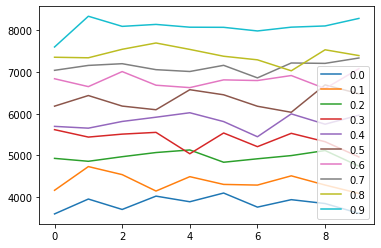

In [87]:
num_episodes = 10
env = RudeBandits(pulls=1000)

for eps in np.arange(0.0, 1.00, 0.1):
    q, rewards = run_qlearning(env, eps=eps, lr=0.01, gamma=0.4, num_episodes=num_episodes)
    print(f"q for epsilon {eps:.1f} is")
    print(f"{q}")
    plt.plot(np.arange(num_episodes), rewards, label=f"{eps:.1f}")

plt.legend()
plt.show()